In [103]:
import warnings
warnings.filterwarnings("ignore")

In [104]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/MENS_CLOTHING_SALES_2018 .csv', index_col=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 4 columns):
AnnualSales        385 non-null float64
Sales              385 non-null float64
SFloorSize         400 non-null int64
TotalInvestment    385 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.6 KB


In [105]:
# Task 1

In [106]:
## Identify significant measurements/values
print('----Annual Sales----')
print(df['AnnualSales'].describe())
print('-------Sales-------')
print(df['Sales'].describe())
print('----SFloorSize----')
print(df['SFloorSize'].describe())
print('----Total Investment----')
print(df['TotalInvestment'].describe())

----Annual Sales----
count    3.850000e+02
mean     8.320083e+05
std      5.859337e+05
min      5.000000e+04
25%      4.953400e+05
50%      6.942270e+05
75%      9.768170e+05
max      5.000000e+06
Name: AnnualSales, dtype: float64
-------Sales-------
count      385.000000
mean      6353.494951
std       3770.794382
min        300.000000
25%       3904.200000
50%       5333.333000
75%       7822.003000
max      27000.000000
Name: Sales, dtype: float64
----SFloorSize----
count     400.000000
mean      144.875000
std       114.562716
min         0.000000
25%        80.000000
50%       117.000000
75%       180.000000
max      1214.000000
Name: SFloorSize, dtype: float64
----Total Investment----
count    3.850000e+02
mean     8.494850e+04
std      1.322060e+05
min      4.000000e+03
25%      3.720704e+04
50%      4.506689e+04
75%      7.889412e+04
max      1.800000e+06
Name: TotalInvestment, dtype: float64


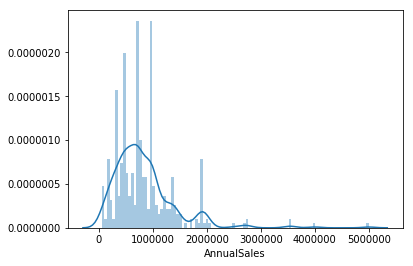

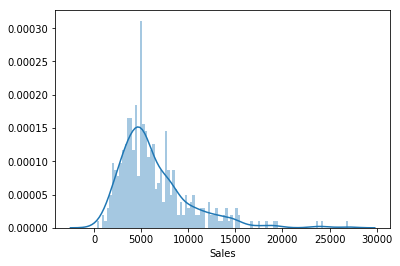

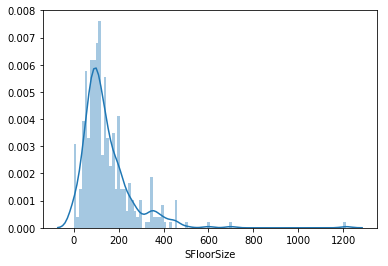

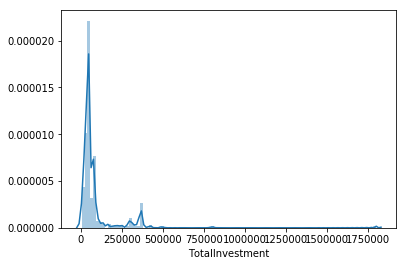

In [107]:
## Further identify erronous values
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of RegDens
ansales_dist = sns.distplot(df['AnnualSales'].dropna(), bins=100)
plt.show()
# Distribution of MedHHInc
sales_dist = sns.distplot(df['Sales'].dropna(), bins=100)
plt.show()
# Distribution of MeanHHSz
floorsize_dist = sns.distplot(df['SFloorSize'].dropna(), bins=100)
plt.show()
# Distribution of MeanHHSz
totalinvest_dist = sns.distplot(df['TotalInvestment'].dropna(), bins=100)
plt.show()

In [108]:
## Remove SFloorSize is 0 as all other columns are empty with these rows.
df = df[df['SFloorSize'] >= 1]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 1 to 400
Data columns (total 4 columns):
AnnualSales        385 non-null float64
Sales              385 non-null float64
SFloorSize         385 non-null int64
TotalInvestment    385 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.0 KB


In [109]:
worst_df = df.sort_values(by='Sales', ascending=True)
print(worst_df.head(20))

           AnnualSales      Sales  SFloorSize  TotalInvestment
StoreCode                                                     
287            60000.0   300.0000         200         45066.89
310            77369.0   859.6556          90         78894.12
217            77369.0   910.2235          85         45066.89
24             77369.0  1289.4830          60         45066.89
76            156168.0  1382.0180         113         45066.89
163            77369.0  1487.8650          52         45066.89
255            77369.0  1547.3800          50         45066.89
391          1993529.0  1642.1160        1214         78894.12
233          1182183.0  1688.8330         700        123759.04
49            694227.0  1735.5680         400        245000.00
220           795655.0  1768.1220         450         44343.71
37            400000.0  1818.1820         220         45066.89
249           495340.0  1905.1540         260         78894.12
304            77369.0  1934.2250          40         4

In [110]:
## Remove Store 287 as it is underperforming.
worst_sales = df.sort_values(by='Sales', ascending=False)
worst_sales_drop = worst_sales[:-1]
df = worst_sales_drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 207 to 310
Data columns (total 4 columns):
AnnualSales        384 non-null float64
Sales              384 non-null float64
SFloorSize         384 non-null int64
TotalInvestment    384 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.0 KB


In [111]:
# Task 2

In [112]:
## Scale values for clustering model consumption
from sklearn.preprocessing import StandardScaler

df2 = df[['AnnualSales', 'Sales', 'SFloorSize', 'TotalInvestment']]
X = df2.as_matrix()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [113]:
from sklearn.cluster import KMeans
rs = 10
# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 871.7092233218882
Centroid locations:
[-0.41784274 -0.37844681 -0.22043826 -0.20499528]
[ 1.44458351 -0.31807172  1.87120243  1.06498848]
[ 0.50449012  1.5709343  -0.49350321  0.00348418]


In [114]:
model = KMeans(n_clusters=3, random_state=rs).fit(X)
# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2['Scaled_Cluster_ID'] = y
# how many records are in each cluster
print("Cluster membership")
print(df2['Scaled_Cluster_ID'].value_counts())

Cluster membership
0    261
2     73
1     50
Name: Scaled_Cluster_ID, dtype: int64


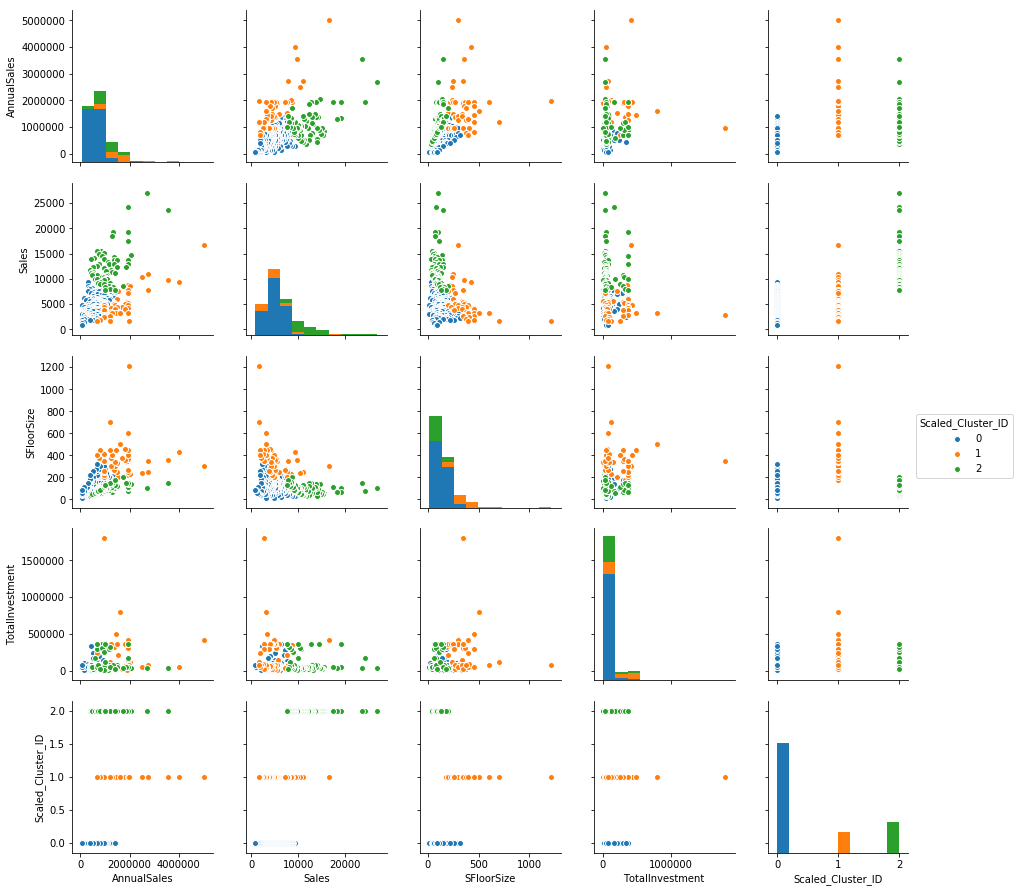

In [115]:
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Scaled_Cluster_ID')
plt.show()

In [116]:
## Non Standardized model
from sklearn.preprocessing import StandardScaler

df3 = df[['AnnualSales', 'Sales', 'SFloorSize', 'TotalInvestment']]
X2 = df3.as_matrix()

In [117]:
## Perform kmeans using a raw(un-normalized) set of data
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X2)

print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X2)
df3['Base_Cluster_ID'] = y
print("Number of items per cluster:")
print(df3['Base_Cluster_ID'].value_counts())

Sum of intra-cluster distance: 37985648078637.52
Centroid locations:
[4.73953061e+05 5.26891018e+03 1.04028302e+02 5.87493013e+04]
[2.26414056e+06 1.01839560e+04 3.07125000e+02 1.45070742e+05]
[1.05237606e+06 7.16357148e+03 1.84771429e+02 1.11164213e+05]
Number of items per cluster:
0    212
2    140
1     32
Name: Base_Cluster_ID, dtype: int64


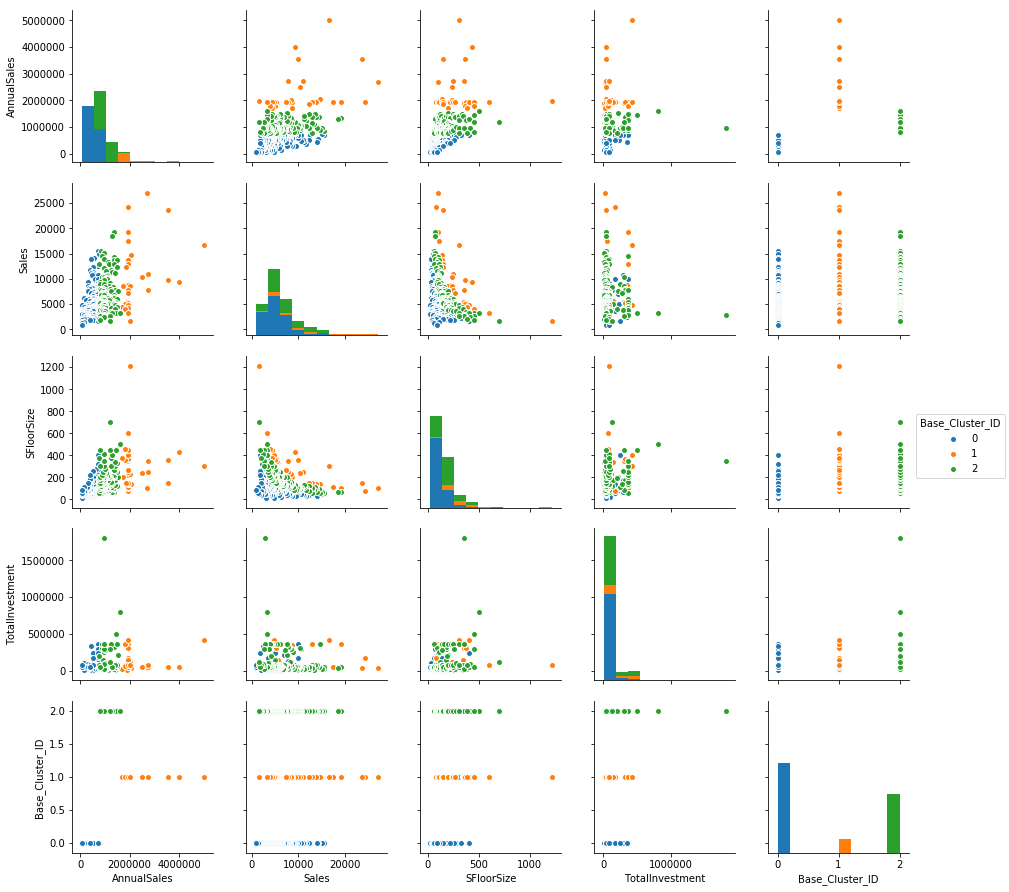

In [118]:
cluster_g = sns.pairplot(df3, hue='Base_Cluster_ID')
plt.show()

Distribution for cluster 0


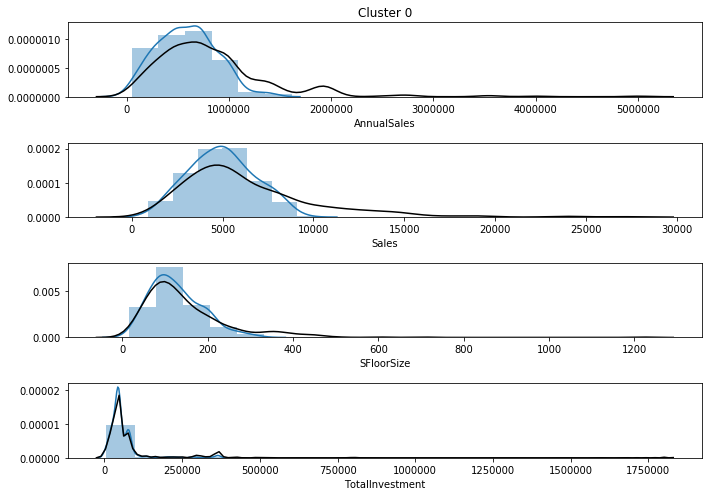

Distribution for cluster 1


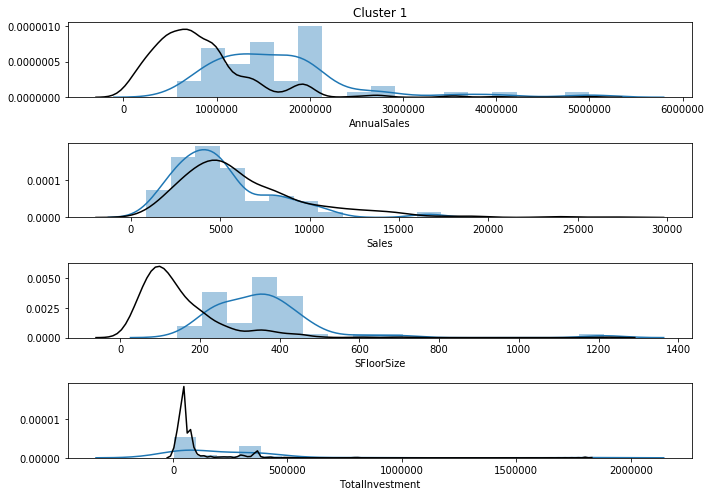

Distribution for cluster 2


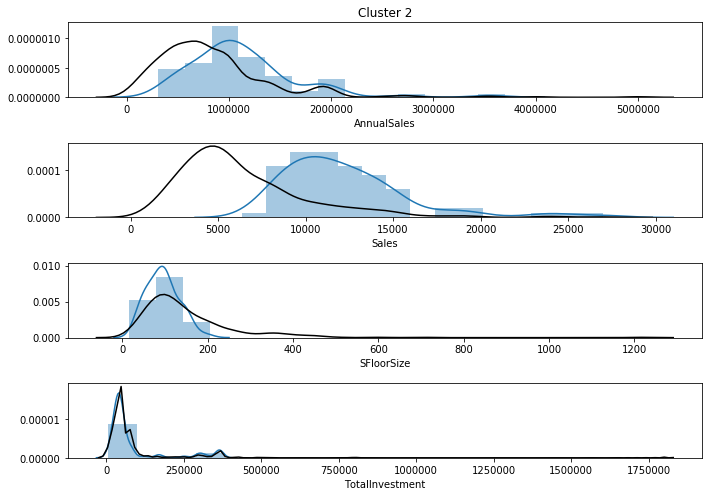

In [119]:
# Ignore warnings to make it a bit more concise
import warnings
warnings.filterwarnings("ignore")


# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['AnnualSales', 'Sales', 'SFloorSize', 'TotalInvestment']
n_bins = 20
# inspecting cluster 0 and 1
clusters_to_inspect = [0,1,2]
for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))
    # create subplots
    fig, ax = plt.subplots(nrows=4, figsize=(10,7))
    ax[0].set_title("Cluster {}".format(cluster))
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Scaled_Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")
    plt.tight_layout()
    plt.show()

In [120]:
# Task 3

In [121]:
df4 = df[['AnnualSales', 'Sales', 'SFloorSize', 'TotalInvestment']]
X3 = df4.as_matrix()
scaler = StandardScaler()
X3 = scaler.fit_transform(X)

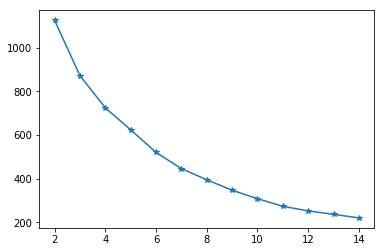

In [122]:
## Test using elbow to find optimal K
clusters = []
inertia_vals = []

for k in range(2, 15, 1):
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X3)

    clusters.append(model)
    inertia_vals.append(model.inertia_)

plt.plot(range(2,15,1), inertia_vals, marker='*')
plt.show()

In [123]:
## Elbow exists between 3 and 5
## Test using sillohette to find optimal K
from sklearn.metrics import silhouette_score
print(clusters[1])
print("Silhouette score for k=3", silhouette_score(X3, clusters[1].predict(X)), '\n')
print(clusters[2])
print("Silhouette score for k=4", silhouette_score(X3, clusters[2].predict(X)), '\n')
print(clusters[3])
print("Silhouette score for k=5", silhouette_score(X3, clusters[3].predict(X)), '\n')

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=3 0.4020232680236733 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=4 0.4065827501282165 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=5 0.4363687852726264 



Sum of intra-cluster distance: 724.3013451660984
Centroid locations:
[-0.42851104 -0.3757409  -0.23633328 -0.20463431]
[ 1.41315012 -0.32278609  1.83142236  0.76092278]
[ 0.24426482 -0.95217432  1.76575735 12.97332163]
[ 0.50449012  1.5709343  -0.49350321  0.00348418]
Cluster membership
0    258
3     73
1     52
2      1
Name: Cluster_ID, dtype: int64


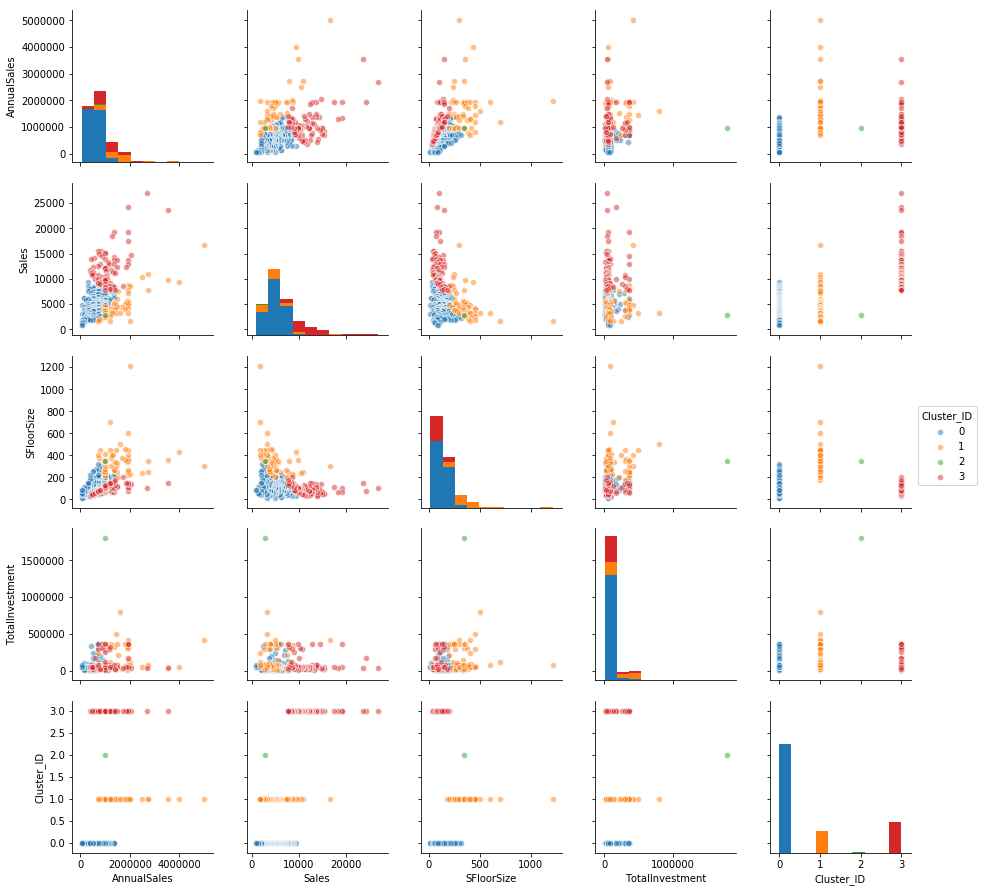

In [124]:
## k=4 is best
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X3)

print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)
y = model.predict(X3)
df4['Cluster_ID'] = y

print("Cluster membership")
print(df4['Cluster_ID'].value_counts())

cluster_g = sns.pairplot(df4, hue='Cluster_ID', plot_kws={'alpha': 0.5})
plt.show()

In [125]:
# 4th cluster is just used for a single outlier